In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-headlines-news-dataset/india-news-headlines.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Download historical stock prices from finance.yahoo.com

# The tech stocks we'll use for this analysis
stock = 'GOOG'

# Set up End and Start times for data grab (In our case, 3 years stock data)
start = datetime(2018, 1, 1, 0, 0, 0, 0)
end = datetime(2020, 12, 31, 0, 0, 0, 0)

#Getting stock data from yahoo of Google company for last 3 years 
globals()[stock] = DataReader(stock, 'yahoo', start, end)
stock = GOOG.copy()

#Displaying dataframe shape and few records
print(stock.shape)
stock.head()

(756, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941


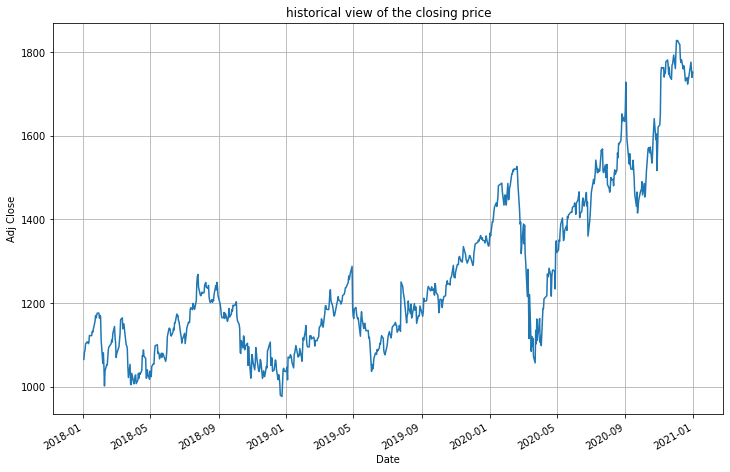

In [4]:
#Let's see a historical view of the closing price

plt.figure(figsize=(12, 8))
stock['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.grid()
plt.title('historical view of the closing price')
plt.show()

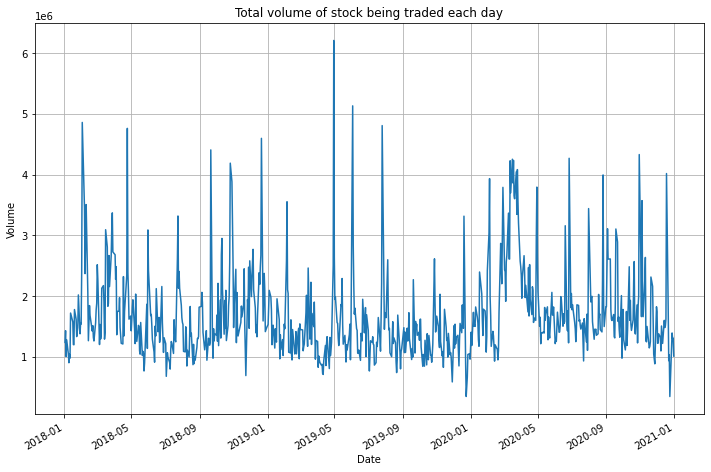

In [5]:
#Let's plot the total volume of stock being traded each day

plt.figure(figsize=(12, 8))
stock['Volume'].plot()
plt.grid()
plt.ylabel('Volume')
plt.title('Total volume of stock being traded each day')
plt.show()

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Adj Close'}>],
       [<AxesSubplot:title={'center':'mov_avg for 10 days'}>,
        <AxesSubplot:title={'center':'mov_avg for 20 days'}>,
        <AxesSubplot:title={'center':'mov_avg for 30 days'}>]],
      dtype=object)

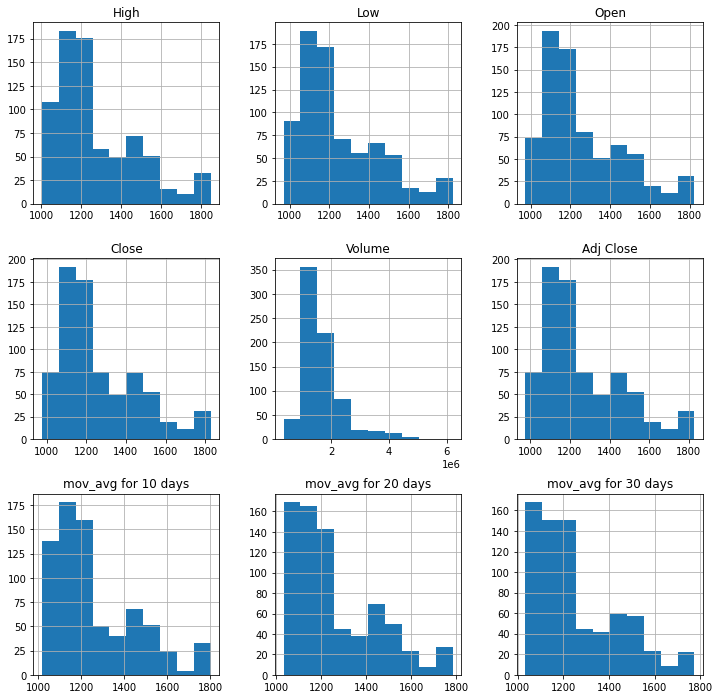

In [6]:

#We'll calculate movig average of stocks for 10,20 & 30 days
mov_avg_day = [10, 20, 30]

for ma in mov_avg_day:
  column_name = f"mov_avg for {ma} days"
  stock[column_name] = stock['Adj Close'].rolling(ma).mean()

    
stock.hist(figsize=(12, 12))


In [7]:
#stock dataframe with added moving averages
stock

,High,Low,Open,Close,Volume,Adj Close,mov_avg for 10 days,mov_avg for 20 days,mov_avg for 30 days
Date,,,,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000,NaN,NaN,NaN
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980,NaN,NaN,NaN
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024,NaN,NaN,NaN
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980,NaN,NaN,NaN
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976,1748.561011,1775.891998,1770.809668
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966,1747.993005,1775.037000,1771.684668
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971,1747.858997,1774.935999,1771.074666


<Figure size 864x576 with 0 Axes>

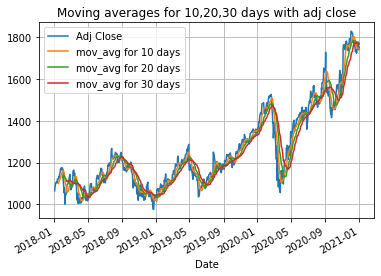

In [8]:
#Plotting moving averages for 10,20,30 days with adj close

plt.figure(figsize=(12, 8))
stock[['Adj Close', 'mov_avg for 10 days', 'mov_avg for 20 days', 'mov_avg for 30 days']].plot()
plt.title('Moving averages for 10,20,30 days with adj close')
plt.grid()
plt.show()

In [9]:
# We'll use pct_change to find the percent change in stock for each day
stock['Daily Return'] = stock['Adj Close'].pct_change()

In [10]:
#stock dataframe with added Daily return in stock
stock

,High,Low,Open,Close,Volume,Adj Close,mov_avg for 10 days,mov_avg for 20 days,mov_avg for 30 days,Daily Return
Date,,,,,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000,NaN,NaN,NaN,NaN
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980,NaN,NaN,NaN,0.016413
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024,NaN,NaN,NaN,0.003621
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980,NaN,NaN,NaN,0.014571
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941,NaN,NaN,NaN,0.004273
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976,1748.561011,1775.891998,1770.809668,0.003735
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966,1747.993005,1775.037000,1771.684668,0.021416
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971,1747.858997,1774.935999,1771.074666,-0.009780


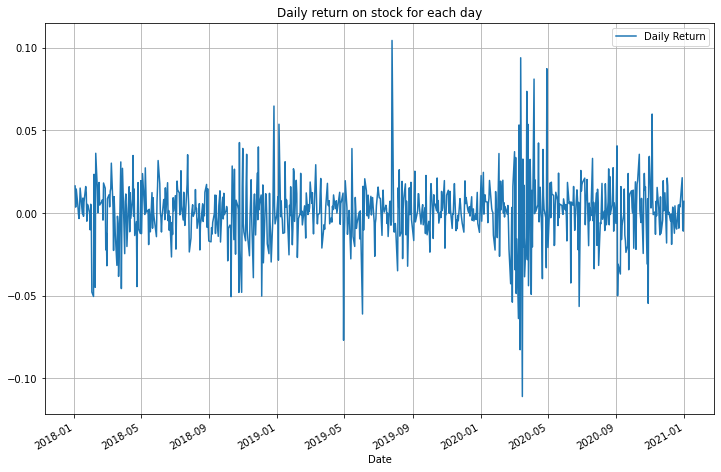

In [11]:
#Plotting the daily return percentage of stock for each day

plt.figure(figsize=(12, 8))
stock['Daily Return'].plot(legend=True)
plt.title('Daily return on stock for each day')
plt.grid()
plt.show()

In [12]:
#Reading data(source: https://bit.ly/36fFPI6)

news = pd.read_csv('/kaggle/input/india-headlines-news-dataset/india-news-headlines.csv')

print(news.shape)
news.head()

(3424067, 3)


,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [13]:
#Dropping headline_category
news.drop('headline_category', axis = 1, inplace=True)

#Changing the date format for column publish_date
news['publish_date'] = pd.to_datetime(news['publish_date'],format= '%Y%m%d')

#Renaming the column publish_date as Date
news.rename(columns={'publish_date':'Date'}, inplace=True)

news

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


In [14]:

#Grouping the headlines for each day

news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news.drop_duplicates(subset='Date', keep='first', inplace=True)
news.reset_index(inplace = True, drop = True)
news

,Date,headline_text,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to India,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class,Light combat craft takes India into club class...
...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,Numerology Readings 30 December 2020: Predicti...


In [15]:
#Dropping headline_text column
news.drop('headline_text', axis = 1, inplace=True)

#Setting Date column as index
news.set_index("Date", inplace = True)

news

,News
Date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,Powerless north India gropes in the dark Think...
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


In [16]:
#Getting new data only for our stock data Dates
temp = news['News'].loc[str(stock.index[0])[:10] : str(stock.index[-1])[:10]]

#Creating dataframe with stock data dates only
news_3yrs = pd.DataFrame(temp)

news_3yrs

,News
Date,
2018-01-02,Big Bash League: Where; when and how to watch ...
2018-01-03,High-quality heroin worth Rs 15 crore seized B...
2018-01-04,Bones with blood stains found dumped near dust...
2018-01-05,In maths; Vijayawada students a notch above th...
2018-01-06,Governments must encourage scale-up of ICTS Th...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


In [17]:
#Dropping NA values
news_3yrs.dropna(inplace=True)

In [18]:
import nltk
import re
from tqdm import tqdm
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer as ps

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
#Cleaning headlines

c = []
for i in tqdm(range(len(news_3yrs['News']))):
    temp = re.sub('[^a-zA-Z]',' ', news_3yrs['News'][i])
    temp = temp.lower()
    temp = temp.split()
    temp = [word for word in temp if not word in set(stopwords.words('english'))]
    temp=' '.join(temp)
    c.append(temp)

100%|██████████| 1095/1095 [12:11<00:00,  1.50it/s]


In [20]:
news_3yrs['News'] = c
news_3yrs

,News
Date,
2018-01-02,big bash league watch live streaming big bash ...
2018-01-03,high quality heroin worth rs crore seized buil...
2018-01-04,bones blood stains found dumped near dustbin a...
2018-01-05,maths vijayawada students notch rest work proj...
2018-01-06,governments must encourage scale icts think tw...
...,...
2020-12-27,biginterview dhritiman chatterjee nobody dares...
2020-12-28,horoscope today december check astrological pr...
2020-12-29,man recovers charred remains thief burnt shop ...


In [21]:
#Merging stock and news_3yrs dataframe on Date column
data = pd.merge(stock, news_3yrs, how ='inner', on ='Date')

#Dropping na values if any
data.dropna()

data

,High,Low,Open,Close,Volume,Adj Close,mov_avg for 10 days,mov_avg for 20 days,mov_avg for 30 days,Daily Return,News
Date,,,,,,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000,NaN,NaN,NaN,NaN,big bash league watch live streaming big bash ...
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980,NaN,NaN,NaN,0.016413,high quality heroin worth rs crore seized buil...
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024,NaN,NaN,NaN,0.003621,bones blood stains found dumped near dustbin a...
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980,NaN,NaN,NaN,0.014571,maths vijayawada students notch rest work proj...
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941,NaN,NaN,NaN,0.004273,two endeavours one aim easing lives awareness ...
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976,1748.561011,1775.891998,1770.809668,0.003735,set mood sex cold winters two houses blow guja...
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966,1747.993005,1775.037000,1771.684668,0.021416,horoscope today december check astrological pr...
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971,1747.858997,1774.935999,1771.074666,-0.009780,man recovers charred remains thief burnt shop ...


In [22]:
#Storing merged dataframe to csv file for later use
data.to_csv('stock_news_final_data.csv')

In [23]:
#Functions to get the subjectivity and polarity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [24]:
#Adding subjectivity and polarity columns
data['Subjectivity'] = data['News'].apply(getSubjectivity)
data['Polarity'] = data['News'].apply(getPolarity)

In [25]:
#Adding sentiment score to data

sia = SentimentIntensityAnalyzer()

data['Compound'] = [sia.polarity_scores(v)['compound'] for v in data['News']]
data['Negative'] = [sia.polarity_scores(v)['neg'] for v in data['News']]
data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in data['News']]
data['Positive'] = [sia.polarity_scores(v)['pos'] for v in data['News']]

In [26]:
#data with added sentiment scores
data

,High,Low,Open,Close,Volume,Adj Close,mov_avg for 10 days,mov_avg for 20 days,mov_avg for 30 days,Daily Return,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,,,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000,NaN,NaN,NaN,NaN,big bash league watch live streaming big bash ...,0.421891,0.036710,-0.9998,0.163,0.722,0.114
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980,NaN,NaN,NaN,0.016413,high quality heroin worth rs crore seized buil...,0.389935,0.041552,-0.9999,0.178,0.722,0.100
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024,NaN,NaN,NaN,0.003621,bones blood stains found dumped near dustbin a...,0.392054,0.025632,-0.9999,0.186,0.719,0.095
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980,NaN,NaN,NaN,0.014571,maths vijayawada students notch rest work proj...,0.379984,0.028766,-0.9998,0.165,0.725,0.111
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941,NaN,NaN,NaN,0.004273,two endeavours one aim easing lives awareness ...,0.402443,0.049338,-0.9998,0.164,0.719,0.117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976,1748.561011,1775.891998,1770.809668,0.003735,set mood sex cold winters two houses blow guja...,0.379621,0.046262,-0.9994,0.143,0.748,0.109
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966,1747.993005,1775.037000,1771.684668,0.021416,horoscope today december check astrological pr...,0.400613,0.043856,-0.9995,0.144,0.752,0.105
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971,1747.858997,1774.935999,1771.074666,-0.009780,man recovers charred remains thief burnt shop ...,0.414258,0.047545,-0.9997,0.160,0.735,0.105


In [27]:
#Dropping News column which contains textual info about news
data.drop('News', axis = 1, inplace=True)

#Storing dataframe to csv file for later use
data.to_csv('stock_news_final_data.csv')

In [28]:
data

,High,Low,Open,Close,Volume,Adj Close,mov_avg for 10 days,mov_avg for 20 days,mov_avg for 30 days,Daily Return,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000,NaN,NaN,NaN,NaN,0.421891,0.036710,-0.9998,0.163,0.722,0.114
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980,NaN,NaN,NaN,0.016413,0.389935,0.041552,-0.9999,0.178,0.722,0.100
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024,NaN,NaN,NaN,0.003621,0.392054,0.025632,-0.9999,0.186,0.719,0.095
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980,NaN,NaN,NaN,0.014571,0.379984,0.028766,-0.9998,0.165,0.725,0.111
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941,NaN,NaN,NaN,0.004273,0.402443,0.049338,-0.9998,0.164,0.719,0.117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976,1748.561011,1775.891998,1770.809668,0.003735,0.379621,0.046262,-0.9994,0.143,0.748,0.109
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966,1747.993005,1775.037000,1771.684668,0.021416,0.400613,0.043856,-0.9995,0.144,0.752,0.105
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971,1747.858997,1774.935999,1771.074666,-0.009780,0.414258,0.047545,-0.9997,0.160,0.735,0.105


In [29]:
#Picking only required columns

df = data[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,
2018-01-02,1065.000000,0.421891,0.036710,-0.9998,0.163,0.722,0.114
2018-01-03,1082.479980,0.389935,0.041552,-0.9999,0.178,0.722,0.100
2018-01-04,1086.400024,0.392054,0.025632,-0.9999,0.186,0.719,0.095
2018-01-05,1102.229980,0.379984,0.028766,-0.9998,0.165,0.725,0.111
2018-01-08,1106.939941,0.402443,0.049338,-0.9998,0.164,0.719,0.117
...,...,...,...,...,...,...,...
2020-12-24,1738.849976,0.379621,0.046262,-0.9994,0.143,0.748,0.109
2020-12-28,1776.089966,0.400613,0.043856,-0.9995,0.144,0.752,0.105
2020-12-29,1758.719971,0.414258,0.047545,-0.9997,0.160,0.735,0.105


In [30]:
#x and y for training and test

x = df.drop('Close', axis=1)
y = df['Close']

In [31]:
from sklearn.preprocessing import MinMaxScaler

mimasc = MinMaxScaler()
y = mimasc.fit_transform(np.array(y).reshape(-1, 1))

In [32]:
#Preparing train and test data
#Since it is a time series data, so splitting data in series only

x_train = x[:int(x.shape[0] * 0.8)]
y_train = y[:int(y.shape[0] * 0.8)]

x_test = x[int(x.shape[0] * 0.8):]
y_test = y[int(y.shape[0] * 0.8):]

In [33]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [34]:
#mean_absolute_error is one of the ideal metric for regression task although there is no optimal value for it.
#But the balance between train and test error should be there in MAE to avoid
#underfitting(very high MSE for test/validation/unseen data) and overfitting(very low MSE for training data).

from sklearn.metrics import mean_absolute_error,mean_squared_error

print('Mean Absolute Error (MAE) for train data:',mean_absolute_error(dt.predict(x_train), y_train))
print('Mean Squared Error (MAE) for train data:',mean_squared_error(dt.predict(x_train), y_train))
print()
print('Mean Absolute Error (MAE) for test data:',mean_absolute_error(dt.predict(x_test), y_test))
print('Mean Squared Error (MAE) for test data:',mean_squared_error(dt.predict(x_test), y_test))

Mean Absolute Error (MAE) for train data: 0.0
Mean Squared Error (MAE) for train data: 0.0

Mean Absolute Error (MAE) for test data: 0.43561536498227815
Mean Squared Error (MAE) for test data: 0.23399145996197754


In [35]:
from sklearn.model_selection import GridSearchCV

para = {'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6,7,8,9,10]}
dt_cv = GridSearchCV(dt, para, n_jobs=-1)
dt_cv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [36]:
#Best hyper-parameter
dt_cv.best_params_

{'max_depth': 1, 'min_samples_split': 6}

In [37]:
print('Mean Absolute Error (MAE) for train data:',mean_absolute_error(dt_cv.predict(x_train), y_train))
print('Mean Squared Error (MAE) for train data:',mean_squared_error(dt_cv.predict(x_train), y_train))
print('Mean Absolute Error (MAE) for test data:',mean_absolute_error(dt_cv.predict(x_test), y_test))
print('Mean Squared Error (MAE) for test data:',mean_squared_error(dt_cv.predict(x_test), y_test))

Mean Absolute Error (MAE) for train data: 0.1028348236925058
Mean Squared Error (MAE) for train data: 0.01761340674011357
Mean Absolute Error (MAE) for test data: 0.45932171869926597
Mean Squared Error (MAE) for test data: 0.2346291800240049
